In [1]:
import numpy as np
import matplotlib as mpl
import pandas as pd
import gc
import pickle
import matplotlib.pyplot as plt
from __future__ import print_function
mpl.rcParams['figure.figsize'] = (18, 6)

#import numpy as np


# Read cleaned data
Start here if data has been saved, and/or restart kernel to save memory

In [2]:
%%time
goodv = np.load('goodv.npy')

goodc = np.load('goodc.npy')

goodl = np.load('goodl.npy')

with open('goodk.pkl', 'rb') as f:
    goodk = pickle.load(f)


CPU times: user 1.61 s, sys: 5.26 s, total: 6.88 s
Wall time: 15.8 s


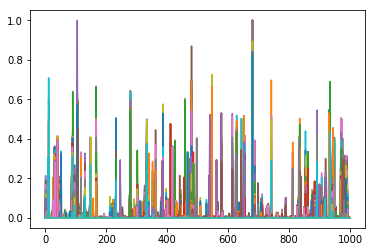

In [3]:
import matplotlib.pyplot as plt
plt.plot(np.transpose(goodc[2000:3000,:]));

In [4]:
print np.sum(labels[0,:])
print np.sum(labels[:,1])
print np.argwhere(np.isnan(labels))
#print np.max(labels,axis=1)

SyntaxError: invalid syntax (<ipython-input-4-b1a9b94fb2c3>, line 1)

In [ ]:
print np.sum(goodl[0,:])
print np.sum(goodl[:,1])
print np.argwhere(np.isnan(labels))
#print np.max(labels,axis=1)

In [ ]:
#df = pd.DataFrame(np.random.randn(8, 4), index=dates, columns=['A', 'B', 'C', 'D'])
df = pd.DataFrame({"A": [1, 2], "B": [3.0, 4.5]})
#foo = df.values[columns=df.columns[1:]]
foo = df['A'].values
print foo

print type(df)
print type(gb)

In [ ]:
#http://www.apnorton.com/blog/2016/12/19/Visualizing-Multidimensional-Data-in-Python/

from sklearn.decomposition import PCA as sklearnPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.datasets.samples_generator import make_blobs

from pandas.tools.plotting import parallel_coordinates

In [ ]:
X, y = make_blobs(n_samples=200, centers=3, n_features=3, random_state=0)
plt.scatter(X[:,0], X[:,2], c=y)
plt.show()

In [ ]:

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
cols =  ['Class', 'Alcohol', 'MalicAcid', 'Ash', 'AlcalinityOfAsh', 'Magnesium', 'TotalPhenols', 
         'Flavanoids', 'NonflavanoidPhenols', 'Proanthocyanins', 'ColorIntensity', 
         'Hue', 'OD280/OD315', 'Proline']
data = pd.read_csv(url, names=cols)

y = data['Class']          # Split off classifications
X = data.loc[:, 'Alcohol':] # Split off features

In [ ]:
data = pd.read_csv('iris.csv', names=['sepal_length','sepal_width','petal_length','petal_width','species'])

In [ ]:
iris =  np.loadtxt('iris-num.csv', skiprows=1,delimiter=',')
print iris.shape

In [ ]:
y=iris[:,4]
plt.scatter(iris[:,0], iris[:,1], c=y)

In [ ]:
#https://www.kdnuggets.com/2018/08/introduction-t-sne-python.html

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from time import time


In [ ]:
irises = pd.read_csv('iris.csv', skiprows=1, names=['sepal_length','sepal_width','petal_length','petal_width','species'])

In [ ]:

pd.set_option('display.max_columns', None) # Show All Columns in Preview
display(gb.head(n=5))

In [ ]:
gb.read_hdf('ganimages.hdf')

In [ ]:
#decimate data so we don't run out of memory:

dfsmall = gb.iloc[[0::1000], [1, 7, 8]]

display(gbsmall.head(n=5))

In [ ]:
foo = gb.values
print foo.shape

In [ ]:
pd.set_option('display.max_columns', None) # Show All Columns in Preview
display(irises.head(n=5))


In [ ]:
display(pd.crosstab(index=irises['species'], columns='count'))

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
feat_cols =
pca_result = pca.fit_transform(df[feat_cols].values)